In [9]:
import pandas as pd 

# # RED WINE QUALITY, 11 DIFFERENT ATTRIBUTES THAT DEFINE WINE QUALITY
df = pd.read_csv("../data/winequality-red.csv")

In [10]:
# VIEW THE FIRST 3 ROWS OF THE DATA
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [11]:
# FILTER
value = int(input("Defina o valor: "))
filtro = df['quality'] == value
df[filtro].head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
18,7.4,0.59,0.08,4.4,0.086,6.0,29.0,0.9974,3.38,0.50,9.0,4
38,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.9940,3.50,0.48,9.8,4
41,8.8,0.61,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4


In [12]:
# MAPPING THE QUALITY LEVELS ACCORDING TO THE DEFINED MAPPING
quality_mapping = {
    3 :0,
    4 :1,
    5 :2,
    6 :3,
    7 :4,
    8 :5 
    }
df.loc[:, "quality"] = df.quality.map(quality_mapping)

**The original dataframe `df` was shuffled.**
*It was then split into:*
* 1000 rows for training (`df_train`) — the first 1000 rows after shuffling.
* 599 rows for testing (`df_test`) — the last 599 rows after shuffling.


In [13]:
# SHUFFLING THE DATASET
df = df.sample(frac=1).reset_index(drop=True)

# SAMPLE FOR TRAINING
df_train = df.head(1000)

# SASMPLE FOR TEST
df_test = df.tail(599)

In [23]:
# LIBS OF ML
from sklearn import tree
from sklearn import metrics

# INITIALIZING DECISION TREE
clf = tree.DecisionTreeClassifier(max_depth=3)

# COLUMNS USED FOR TRAINING
cols = [
'fixed acidity',
'volatile acidity',
'citric acid', 
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']

In [24]:
clf.fit(df_train[cols], df_train.quality)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


**Predictions**

In [30]:
# GENERATE PREDICTIONS ON THE - TRAINING SET
train_predictions = clf.predict(df_train[cols]
                                )
# GENERATE PREDICTIONS ON THE - TEST SET
test_predictions = clf.predict(df_test[cols])

**Accuracy**

In [31]:
# CALCULATE THE ACCURACY OF PREDICTIONS ON - TRAINING DATA SET
train_accuracy = metrics.accuracy_score(
 df_train.quality, train_predictions
)

# CALCULATE THE ACCURACY OF PREDICTIONS ON - TEST DATASET
test_accuracy = metrics.accuracy_score(
 df_test.quality, test_predictions
)

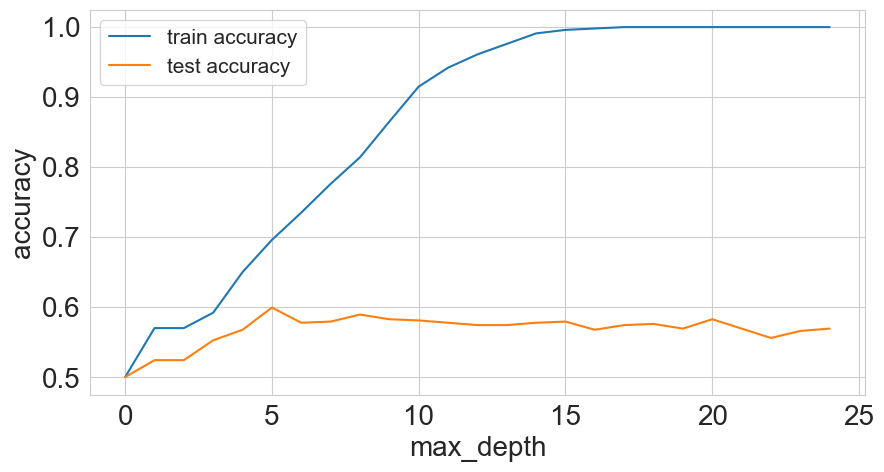

In [ ]:
# NOTE: THIS CODE IS WRITTEN IN A JUPYTER NOTEBOOK

# IMPORT SCIKIT-LEARN TREE AND METRICS
from sklearn import tree
from sklearn import metrics

# IMPORT MATPLOTLIB AND SEABORN FOR PLOTTING
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# THIS IS OUR GLOBAL SIZE OF LABEL TEXT ON THE PLOTS
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

# THIS LINE ENSURES THAT THE PLOT IS DISPLAYED INSIDE THE NOTEBOOK
%matplotlib inline

# INITIALIZE LISTS TO STORE ACCURACIES FOR TRAINING AND TEST DATA
# WE START WITH 50% ACCURACY AS A BASELINE
train_accuracies = [0.5]
test_accuracies = [0.5]

# ITERATE OVER A FEW DEPTH VALUES
for depth in range(1, 25):
    # INIT THE MODEL
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # COLUMNS/FEATURES FOR TRAINING
    # NOTE THAT THIS CAN BE DONE OUTSIDE THE LOOP
    cols = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol'
    ]

    # FIT THE MODEL ON GIVEN FEATURES
    clf.fit(df_train[cols], df_train.quality)

    # CREATE TRAINING & TEST PREDICTIONS
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    # CALCULATE TRAINING & TEST ACCURACIES
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

    # APPEND ACCURACIES
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# CREATE TWO PLOTS USING MATPLOTLIB AND SEABORN
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="TRAIN ACCURACY")
plt.plot(test_accuracies, label="TEST ACCURACY")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("MAX_DEPTH", size=20)
plt.ylabel("ACCURACY", size=20)
plt.show()
